In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3905ff00cf01ef20c30249b14e47d631"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3905ff00cf01ef20c30249b14e47d631


In [6]:
#In the next cell, add the following code that we used to generate the random latitudes. Also, we'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
# Create a set of random latitude and longitude combinations.When we run this cell, the output is a zip object in memory.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

50.617450203550646 83.6117236064249
-48.850057348650594 -111.61472964079853
56.19072722882322 -77.80150160658361
-69.09837915584788 174.98082620533648
0.0802459970061733 -78.64411501080114
63.625668716288544 97.26753369003245
-50.49101925547516 -99.49352035136876
72.05346485533386 -170.4874188939204
-34.33531809274496 36.53185215542993
-71.35437831042115 32.35482455546256
-14.456125789251416 12.750206050661319
89.9524145142548 -96.43578822917895
-76.86368501592041 44.591025160460504
-25.13611293292921 127.04698097460812
24.398940813487926 -48.088189551281346
-25.595375291192013 166.4318368661
72.527021432754 -92.72040941786956
-60.293079449744354 165.69772259593628
-72.91516825346264 -53.165729578475165
24.718940473589655 -56.25129815341356
37.87879384586441 -45.18248027034724
54.2437403847772 127.66947057463938
36.116352233150906 155.03229354809645
-80.40129069800311 115.35989655226899
-5.588623004823603 16.617253779583166
-4.820144733873022 12.759982247136207
36.31826552715265 -34.96

84.3190560929576 137.59073222678376
36.76794324415768 -19.63837043930286
-44.57261537337785 -82.16009981116609
31.344929484263403 6.920585260270343
75.85210330392201 55.63870497552901
48.26017309452405 -113.48553378240382
70.26131517699804 -102.14794342128366
-80.18087626735228 -153.79552415419374
43.15523744055142 -25.470822149317854
14.868730978322077 -55.038924083792494
30.086408110298635 -27.822732223749767
75.51793957960533 150.28681351053558
83.90095771945451 104.00991336640163
-31.435352700122493 13.612795294271791
10.864577103095655 18.77392873328725
-42.05129097447364 161.5794885016369
21.693785935445135 58.17284178404307
-7.053181691703969 175.8150469535579
-31.523314677122357 1.6279676284290758
-76.82369883419658 -166.38651880010545
14.036191329737775 45.83851618722247
-39.48201797082349 72.32111382482717
42.794815585441285 159.86846394526714
41.29089529309465 -19.92446774418059
-56.55146943548118 -55.057010630028756
10.760670193603517 86.91991161778827
17.80931198272789 169

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [10]:
#Some of this code should look familiar, but let's break it down:We create a cities list to store city names.We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | charyshskoye
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | kaitangata
Processing Record 5 of Set 1 | quito
Processing Record 6 of Set 1 | baykit
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | lavrentiya
Processing Record 9 of Set 1 | scottsburgh
City not found. Skipping...
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | lubango
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | yulara
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | vao
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | zeya
Processing Record 22 of Set 1 | s

Processing Record 39 of Set 4 | kangaatsiaq
Processing Record 40 of Set 4 | san cristobal
Processing Record 41 of Set 4 | iqaluit
Processing Record 42 of Set 4 | ilhabela
Processing Record 43 of Set 4 | olafsvik
Processing Record 44 of Set 4 | kaduqli
Processing Record 45 of Set 4 | roura
Processing Record 46 of Set 4 | nhulunbuy
Processing Record 47 of Set 4 | abilene
Processing Record 48 of Set 4 | egvekinot
Processing Record 49 of Set 4 | san patricio
Processing Record 50 of Set 4 | tuy hoa
Processing Record 1 of Set 5 | namatanai
Processing Record 2 of Set 5 | yellowknife
Processing Record 3 of Set 5 | kruisfontein
Processing Record 4 of Set 5 | jumla
Processing Record 5 of Set 5 | rioja
Processing Record 6 of Set 5 | saskylakh
Processing Record 7 of Set 5 | longyearbyen
Processing Record 8 of Set 5 | adrar
Processing Record 9 of Set 5 | toftir
City not found. Skipping...
Processing Record 10 of Set 5 | ljutomer
Processing Record 11 of Set 5 | taolanaro
City not found. Skipping...


Processing Record 30 of Set 8 | mindelo
Processing Record 31 of Set 8 | conceicao do araguaia
Processing Record 32 of Set 8 | kiama
Processing Record 33 of Set 8 | saint anthony
Processing Record 34 of Set 8 | umea
Processing Record 35 of Set 8 | nome
Processing Record 36 of Set 8 | ostrovnoy
Processing Record 37 of Set 8 | harer
Processing Record 38 of Set 8 | port hardy
Processing Record 39 of Set 8 | arlit
Processing Record 40 of Set 8 | ulladulla
Processing Record 41 of Set 8 | goderich
Processing Record 42 of Set 8 | soyo
Processing Record 43 of Set 8 | hay river
Processing Record 44 of Set 8 | faanui
Processing Record 45 of Set 8 | oga
Processing Record 46 of Set 8 | poum
Processing Record 47 of Set 8 | puerto leguizamo
Processing Record 48 of Set 8 | saint-louis
Processing Record 49 of Set 8 | isla mujeres
Processing Record 50 of Set 8 | hambantota
Processing Record 1 of Set 9 | vanimo
Processing Record 2 of Set 9 | kortkeros
Processing Record 3 of Set 9 | taitung
Processing Rec

Processing Record 15 of Set 12 | talcahuano
Processing Record 16 of Set 12 | husavik
Processing Record 17 of Set 12 | altamira
Processing Record 18 of Set 12 | teluknaga
Processing Record 19 of Set 12 | kerema
Processing Record 20 of Set 12 | heihe
Processing Record 21 of Set 12 | sur
Processing Record 22 of Set 12 | vammala
Processing Record 23 of Set 12 | alta floresta
Processing Record 24 of Set 12 | telde
Processing Record 25 of Set 12 | savannah bight
Processing Record 26 of Set 12 | bani walid
Processing Record 27 of Set 12 | ballina
Processing Record 28 of Set 12 | ballangen
Processing Record 29 of Set 12 | sabha
Processing Record 30 of Set 12 | road town
Processing Record 31 of Set 12 | rapid valley
Processing Record 32 of Set 12 | lauf
Processing Record 33 of Set 12 | hammerfest
Processing Record 34 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 35 of Set 12 | bayir
Processing Record 36 of Set 12 | temerloh
Processing Record 37 of Set 12 | merau

In [29]:
len(city_data)

554

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Charyshskoye,51.3978,83.5598,54.28,72,35,6.22,RU,2021-07-17 21:15:42
1,Rikitea,-23.1203,-134.9692,71.96,76,99,27.47,PF,2021-07-17 21:15:43
2,Kaitangata,-46.2817,169.8464,45.64,91,100,5.75,NZ,2021-07-17 21:15:43
3,Quito,-0.2299,-78.5249,60.40,80,81,6.33,EC,2021-07-17 21:12:52
4,Baykit,61.6700,96.3700,57.47,99,100,5.19,RU,2021-07-17 21:15:44
5,Castro,-24.7911,-50.0119,55.76,96,27,5.41,BR,2021-07-17 21:15:44
6,Lavrentiya,65.5833,-171.0000,49.24,83,82,11.61,RU,2021-07-17 21:15:44
7,Port Elizabeth,-33.9180,25.5701,53.89,94,40,8.05,ZA,2021-07-17 21:15:45
8,Lubango,-14.9172,13.4925,58.71,42,8,1.97,AO,2021-07-17 21:15:45
9,Qaanaaq,77.4840,-69.3632,35.10,95,100,4.18,GL,2021-07-17 21:15:45


In [31]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [32]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Charyshskoye,RU,2021-07-17 21:15:42,51.3978,83.5598,54.28,72,35,6.22
1,Rikitea,PF,2021-07-17 21:15:43,-23.1203,-134.9692,71.96,76,99,27.47
2,Kaitangata,NZ,2021-07-17 21:15:43,-46.2817,169.8464,45.64,91,100,5.75
3,Quito,EC,2021-07-17 21:12:52,-0.2299,-78.5249,60.40,80,81,6.33
4,Baykit,RU,2021-07-17 21:15:44,61.6700,96.3700,57.47,99,100,5.19
5,Castro,BR,2021-07-17 21:15:44,-24.7911,-50.0119,55.76,96,27,5.41
6,Lavrentiya,RU,2021-07-17 21:15:44,65.5833,-171.0000,49.24,83,82,11.61
7,Port Elizabeth,ZA,2021-07-17 21:15:45,-33.9180,25.5701,53.89,94,40,8.05
8,Lubango,AO,2021-07-17 21:15:45,-14.9172,13.4925,58.71,42,8,1.97
9,Qaanaaq,GL,2021-07-17 21:15:45,77.4840,-69.3632,35.10,95,100,4.18


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

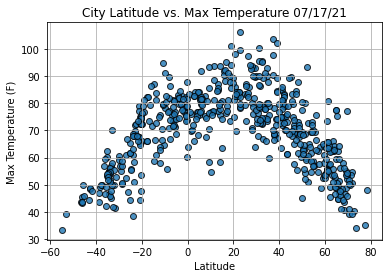

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

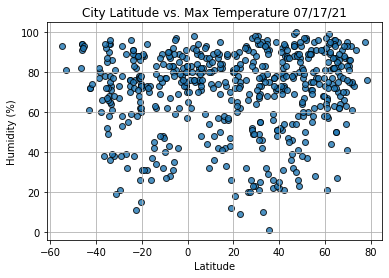

In [36]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

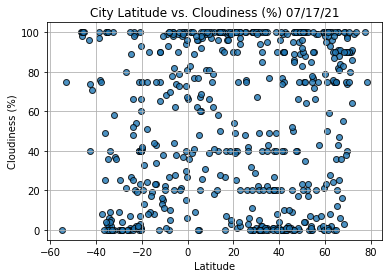

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

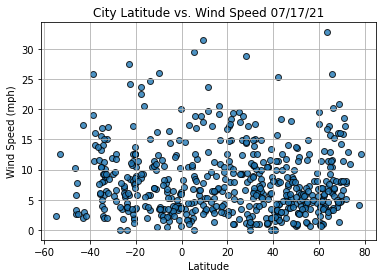

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()